In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
dataset=pd.read_csv(r"C:\Users\jongmin\Downloads\DeepLearning\data\diabetes.csv")
x=dataset.iloc[:,[0,1,2,3,4,6,7]]
y=dataset.iloc[:,5]

In [21]:
# test validation split 해주기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Regression(Random Forest,Decision Tree,Linear Regression)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error


Random Forest Regression

In [24]:
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
y_pred = rfr.predict(x_test)


In [26]:
print('평균제곱근오차', mean_squared_error(y_pred, y_test))


평균제곱근오차 53.863333766233765


Decision *Tree* Regression

In [27]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [28]:
print('평균제곱근오차', mean_squared_error(y_pred, y_test))


평균제곱근오차 80.02201298701299


Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)

In [30]:
print('평균제곱근오차', mean_squared_error(y_pred, y_test))


평균제곱근오차 59.22734666529342


Deep Learning Regression

In [31]:
from tensorflow import keras
from tensorflow.keras import layers


model=keras.Sequential([
    layers.Dense(8,activation="tanh"),
    layers.Dense(8,activation="tanh"),
    layers.Dense(1)
])

model.build((None, x_train.shape[1]))  # (None, input_dim)
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 64        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [33]:
history=model.fit(x_train,y_train,epochs=150,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/150
20/20 [==============================] - 1s 11ms/step - loss: 1069.0498 - mse: 1069.0498 - val_loss: 1129.2887 - val_mse: 1129.2887
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 1060.6284 - mse: 1060.6284 - val_loss: 1119.9800 - val_mse: 1119.9800
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 1052.0242 - mse: 1052.0242 - val_loss: 1109.9768 - val_mse: 1109.9768
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 1042.6377 - mse: 1042.6377 - val_loss: 1098.7988 - val_mse: 1098.7988
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 1032.2194 - mse: 1032.2194 - val_loss: 1086.4150 - val_mse: 1086.4150
Epoch 6/150
20/20 [==============================] - 0s 3ms/step - loss: 1020.3341 - mse: 1020.3341 - val_loss: 1072.4664 - val_mse: 1072.4664
Epoch 7/150
20/20 [==============================] - 0s 3ms/step - loss: 1006.6086 - mse: 1006.6086 - val_loss: 1056.3917 - val_mse: 1056.391

20/20 [==============================] - 0s 3ms/step - loss: 334.4300 - mse: 334.4300 - val_loss: 377.5529 - val_mse: 377.5529
Epoch 60/150
20/20 [==============================] - 0s 3ms/step - loss: 329.1182 - mse: 329.1182 - val_loss: 372.0705 - val_mse: 372.0705
Epoch 61/150
20/20 [==============================] - 0s 3ms/step - loss: 323.8535 - mse: 323.8535 - val_loss: 366.6290 - val_mse: 366.6290
Epoch 62/150
20/20 [==============================] - 0s 3ms/step - loss: 318.6936 - mse: 318.6936 - val_loss: 361.2069 - val_mse: 361.2069
Epoch 63/150
20/20 [==============================] - 0s 3ms/step - loss: 313.6069 - mse: 313.6069 - val_loss: 355.8602 - val_mse: 355.8602
Epoch 64/150
20/20 [==============================] - 0s 3ms/step - loss: 308.5848 - mse: 308.5848 - val_loss: 350.7812 - val_mse: 350.7812
Epoch 65/150
20/20 [==============================] - 0s 3ms/step - loss: 303.7420 - mse: 303.7420 - val_loss: 345.6559 - val_mse: 345.6559
Epoch 66/150
20/20 [=============

20/20 [==============================] - 0s 4ms/step - loss: 134.4248 - mse: 134.4248 - val_loss: 166.9693 - val_mse: 166.9693
Epoch 118/150
20/20 [==============================] - 0s 4ms/step - loss: 132.4611 - mse: 132.4611 - val_loss: 164.8850 - val_mse: 164.8850
Epoch 119/150
20/20 [==============================] - 0s 4ms/step - loss: 130.5528 - mse: 130.5528 - val_loss: 162.7571 - val_mse: 162.7571
Epoch 120/150
20/20 [==============================] - 0s 3ms/step - loss: 128.6466 - mse: 128.6466 - val_loss: 160.7428 - val_mse: 160.7428
Epoch 121/150
20/20 [==============================] - 0s 3ms/step - loss: 126.8093 - mse: 126.8093 - val_loss: 158.7707 - val_mse: 158.7707
Epoch 122/150
20/20 [==============================] - 0s 3ms/step - loss: 125.0197 - mse: 125.0197 - val_loss: 156.7695 - val_mse: 156.7695
Epoch 123/150
20/20 [==============================] - 0s 3ms/step - loss: 123.2241 - mse: 123.2241 - val_loss: 154.8593 - val_mse: 154.8593
Epoch 124/150
20/20 [======

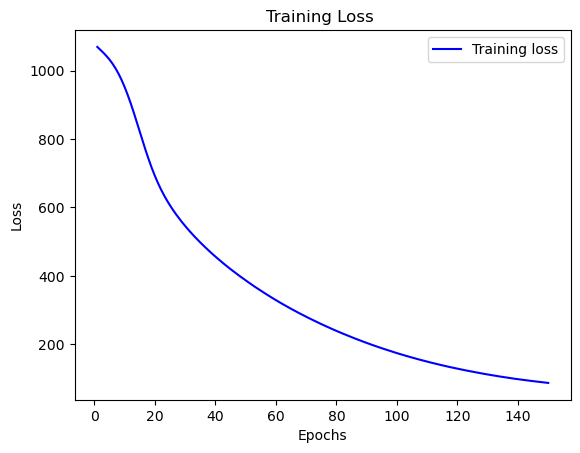

In [34]:
history_dict=history.history
loss_values=history_dict["loss"]
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"b",label="Training loss")
plt.title("Training Loss ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [35]:
print(history_dict.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


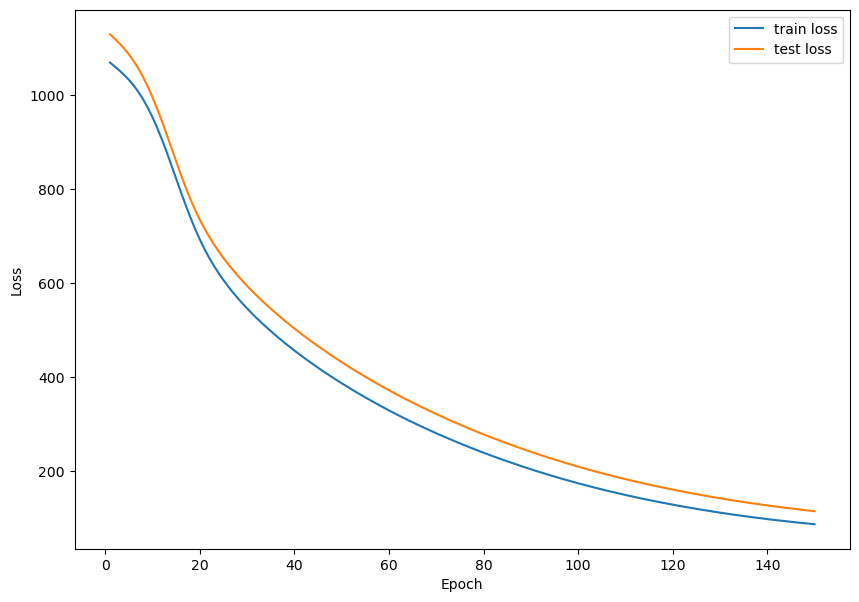

In [36]:
# loss 체크
plt.figure(figsize=(10,7))
epochs=range(1,len(loss_values)+1)

plt.plot(epochs, history.history['loss'], label='train loss')
plt.plot(epochs, history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()